### READ ME
This is a final project for the course 'Business Data Analytics, Quantitative Methods and Visualization' (2021, Copenhagen Business School).
The goal of this project is to be able to predict the outcome of a certain UFC fight, more specifically to predict whether the Red or Blue fighter is more likely to win the match.

We are going to do this through the following steps:
1. __Importing necessary libraries and tools.__
2. __Loading, Cleaning & Exploring the dataset.__
3. __Data pre-processing.__
4. __Machine Learning Models.__
5. __Making a prediction.__
6. __Showcasing results.__

### Legend

- ufc = the original dataset
- column_names = list of column names
- ufc_df = the dataset without NaNs
- datatypes = dictionary with column names + their datatypes
- ufc_ohe = one hot encoded dataset

# 1. Importing necessary libraries and tools.

In [2]:
# libraries

import pandas as pd #used
import matplotlib.pyplot as plt #used
import numpy as np #used
import seaborn as sns #used

# models

from sklearn.neighbors import KNeighborsClassifier #used
from sklearn.neural_network import MLPClassifier #used
from sklearn.tree import DecisionTreeClassifier #used
from sklearn.ensemble import RandomForestClassifier #used

from sklearn.preprocessing import MinMaxScaler #used
from sklearn.feature_selection import SelectKBest #used
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# use cross validation with grid search as well. 
from sklearn.model_selection import GridSearchCV

# other tools

from sklearn.model_selection import train_test_split #used
from sklearn.metrics import accuracy_score #used

import warnings #used

# 2. Loading, Cleaning & Exploring the dataset.

### 2.1 Load excel file (ufc.xlsx) and print out the first couple rows.

In [3]:
ufc = pd.read_excel('newestdataset.xlsx')

### 2.2 Get number of rows and columns.

In [4]:
print('Number of rows:', ufc.shape[0])
print('Number of columns:', ufc.shape[1])

Number of rows: 5144
Number of columns: 78


### 2.3 Get the list of column names.

In [5]:
column_names = ufc.columns

#### *We can call this list whenever we want to check the name of a column.*

### 2.4 Check for missing data.

In [6]:
# ufc.info()

#### *As we can see, there are some NaNs in these columns that should later be taken care of:*
- B_avg_SIG_STR_landed
- B_avg_SIG_STR_pct
- B_avg_SUB_ATT     
- B_avg_TD_landed      
- B_avg_TD_pct
- R_avg_SIG_STR_landed
- R_avg_SIG_STR_pct
- R_avg_SUB_ATT     
- R_avg_TD_landed      
- R_avg_TD_pct  

### 2.5 Check for duplicates.

In [7]:
duplicates = ufc.duplicated()
ufc[duplicates]

,Unnamed: 0,R_odds_dec,B_odds_dec,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,...,R_Height_cms,R_Reach_ins,R_Reach_cms,R_Weight_lbs,R_UFC_fights,R_age,Reach_diff_ins,Age_diff,R_odds,B_odds


#### *It seems that there are no duplicates, therefore, we only need to focus on NaN values.*

### 2.6 Delete rows with at least 1 missing value (NaN).

In [8]:
ufc_df = ufc.dropna()

print('Number of rows:', ufc_df.shape[0])
print('Number of columns:', ufc_df.shape[1])

Number of rows: 2697
Number of columns: 78


#### *1062 rows got dropped.*

### 2.7 Check if columns have the right datatype.

In [9]:
# delete hashtags later

# datatypes = ufc_df.dtypes.to_dict()
# datatypes

- O = object
- int64 = integer
- float64 = float
- <M8[ns] = date ("On a machine whose byte order is little endian, there is no difference between *np.dtype('datetime64[ns]')* and *np.dtype('<M8[ns]')*")
- bool = True/False

### 2.8 Fix datatypes if necessary.

### 2.9 Use info() again to check missing values and datatypes.

In [10]:
ufc_df.columns

Index(['Unnamed: 0', 'R_odds_dec', 'B_odds_dec', 'R_fighter', 'B_fighter',
       'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class',
       'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak',
       'B_avg_KD', 'B_SLpM', 'B_SApM', 'B_Sd', 'B_total_SIG_STR_landed',
       'B_avg_SIG_STR_landed_per_fight', 'B_losses',
       'B_avg_SIG_STR_absorberd_per_fight', 'B_total_SIG_STR_absorbed',
       'B_avg_opp_TOTAL_STR_landed', 'B_total_rounds_fought',
       'B_total_time_fought(minutes)', 'B_total_time_fought(seconds)',
       'B_avg_time_fought_per_fight(seconds)', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_Reach_ins', 'B_UFC_fights', 'B_age', 'B_Reach_cms', 'B_Weight_lbs',
       'R_current_lose_streak', 'R_current_win_streak', 'R_avg_KD', 'R_SLpM

### 2.10 Create a dataframes for visualizations.

In [11]:
# General features
ufc_gen = ufc_df[['R_odds_dec', 'B_odds_dec', 'date', 'location', 'Winner', 'weight_class', 'Reach_diff_ins', 'Age_diff']]

# Red features
ufc_R = ufc_df[['R_odds_dec', 'R_current_lose_streak', 'R_current_win_streak', 'R_total_SIG_STR_landed',
       'R_losses', 'R_total_rounds_fought', 'R_total_time_fought(minutes)',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Stance', 'R_Height_cms',
        'R_Reach_cms', 'R_Weight_lbs', 'R_UFC_fights', 'R_age']]

# Blue features
ufc_B = ufc_df[['B_odds_dec', 'B_current_lose_streak',
       'B_current_win_streak', 
       'B_total_SIG_STR_landed', 'B_losses',
       'B_total_rounds_fought',
       'B_total_time_fought(minutes)', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms',
       'B_UFC_fights', 'B_age', 'B_Reach_cms', 'B_Weight_lbs']]

### 2.11 Use head() for a better overview.

In [12]:
ufc_gen.head()

,R_odds_dec,B_odds_dec,date,location,Winner,weight_class,Reach_diff_ins,Age_diff
0,2.450000,1.606061,2019-06-08,"Chicago, Illinois, USA",Red,Bantamweight,3.0,1
1,1.090909,8.000000,2019-06-08,"Chicago, Illinois, USA",Red,Women's Flyweight,0.0,1
2,1.476190,2.750000,2019-06-08,"Chicago, Illinois, USA",Red,Lightweight,3.0,1
3,4.000000,1.277778,2019-06-08,"Chicago, Illinois, USA",Blue,Bantamweight,1.0,3
4,1.625000,2.400000,2019-06-08,"Chicago, Illinois, USA",Blue,Heavyweight,2.0,6


In [13]:
ufc_R.head()

,R_odds_dec,R_current_lose_streak,R_current_win_streak,R_total_SIG_STR_landed,R_losses,R_total_rounds_fought,R_total_time_fought(minutes),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_UFC_fights,R_age
0,2.450000,0,4,440.0,2,27,123.766667,3,0,2,...,2,0,0,8,Orthodox,162.56,162.56,135.0,10,32.0
1,1.090909,0,2,416.0,2,25,123.900000,2,0,1,...,0,2,0,5,Southpaw,165.10,167.64,125.0,7,31.0
2,1.476190,0,11,832.0,1,33,151.100000,2,0,1,...,3,6,1,14,Orthodox,180.34,193.04,155.0,15,35.0
3,4.000000,1,0,366.0,2,20,92.033333,0,0,1,...,1,0,0,6,Orthodox,162.56,172.72,135.0,8,29.0
4,1.625000,1,0,130.0,1,7,29.383333,0,0,0,...,2,0,0,3,Southpaw,187.96,190.50,264.0,4,26.0


In [14]:
ufc_B.head()

,B_odds_dec,B_current_lose_streak,B_current_win_streak,B_total_SIG_STR_landed,B_losses,B_total_rounds_fought,B_total_time_fought(minutes),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,...,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_UFC_fights,B_age,B_Reach_cms,B_Weight_lbs
0,1.606061,0,4,113.0,1,9,34.950000,0,0,1,...,2,1,0,4,Orthodox,167.64,5,31.0,170.18,135.0
1,8.000000,0,3,513.0,6,29,141.500000,0,0,2,...,0,0,1,4,Orthodox,167.64,10,32.0,167.64,125.0
2,2.750000,0,3,1450.0,8,68,300.633333,1,0,0,...,10,6,0,23,Orthodox,185.42,31,36.0,185.42,155.0
3,1.277778,0,4,281.0,0,9,43.466667,0,0,0,...,2,0,0,4,Switch,170.18,4,26.0,170.18,135.0
4,2.400000,0,1,123.0,1,8,40.000000,0,0,0,...,0,0,0,1,Southpaw,180.34,2,32.0,185.42,250.0


### 2.12 General features.

#### 2.12.1 Odds.

(array([[1.976e+03, 5.350e+02, 1.300e+02, 4.000e+01, 1.300e+01, 3.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.241e+03, 8.100e+02, 3.810e+02, 1.550e+02, 6.300e+01, 2.500e+01,
         1.500e+01, 3.000e+00, 1.000e+00, 3.000e+00]]),
 array([ 1.05882353,  2.20294118,  3.34705882,  4.49117647,  5.63529412,
         6.77941176,  7.92352941,  9.06764706, 10.21176471, 11.35588235,
        12.5       ]),
 <a list of 2 BarContainer objects>)

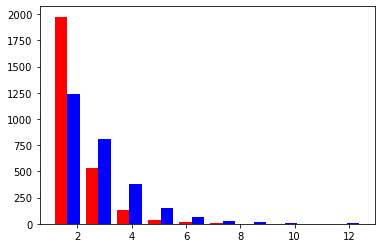

In [15]:
plt.hist(ufc_gen[['R_odds_dec', 'B_odds_dec']], color = ['Red', 'Blue'])

#### 2.12.2 Location.

<AxesSubplot:>

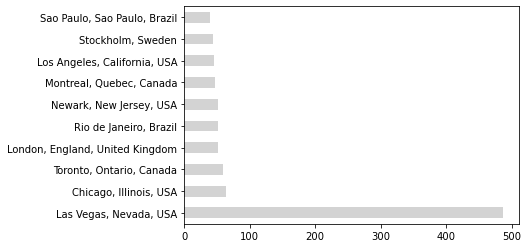

In [30]:
ufc_gen['location'].value_counts().head(10).plot(kind = 'barh', color = 'Lightgrey')

#### *Seems skewed, it's worth considering leaving location out.*

#### 2.12.3 Winner.

D:\Programmes\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


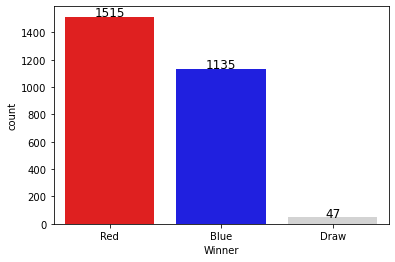

In [43]:
ax = sns.countplot(ufc_gen['Winner'], palette = ['Red', 'Blue', 'Lightgrey'])

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(), ha = 'center', va = 'baseline', color = 'black', size = 12
            )

<AxesSubplot:ylabel='Winner'>

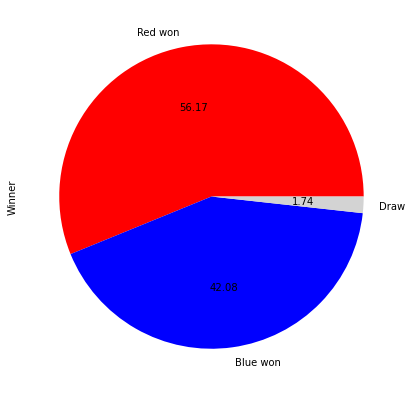

In [36]:
ufc_gen['Winner'].value_counts().plot.pie(colors = ['Red', 'Blue', 'Lightgrey'], labels=['Red won', 'Blue won', 'Draw'], autopct='%.2f', figsize = (7,7))

#### 2.12.4 Weight class.

<AxesSubplot:xlabel='weight_class'>

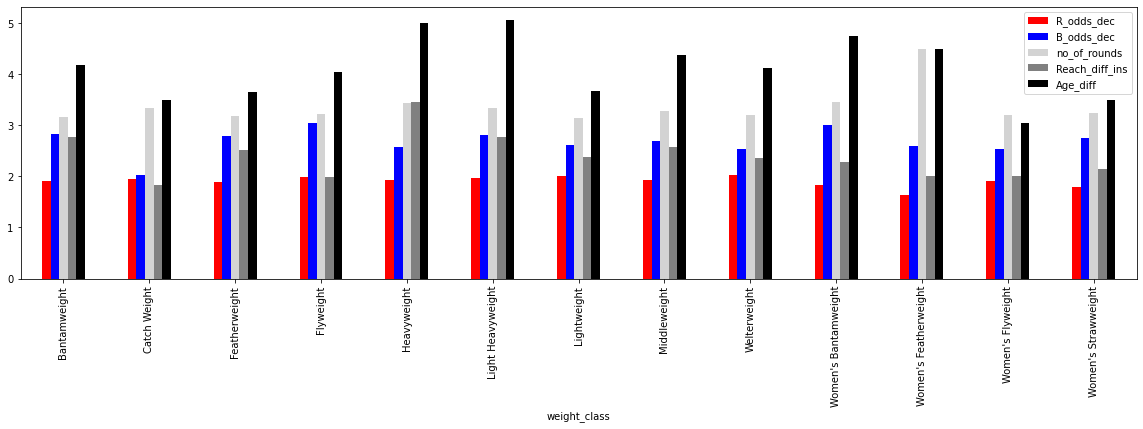

In [73]:
# would be nice to divide it to two graphs by gender

ufc_gen.groupby('weight_class').mean().plot.bar(figsize=(20,5), color = ['Red', 'Blue', 'Lightgrey', 'Grey', 'Black'])

#### *We can see that the features included in this visualization highly depend on what weight class we are talking about, therefore, we should definetely include 'weight_class' in our most important features.*

#### 2.12.5 Reach & Age Difference.

# 3. Data Pre-processing.

### 4.1 Drop already unnecessary columns for an easier analysis.



In [ ]:
ufc_df = ufc_df.drop(labels = ['R_fighter', 'B_fighter',
       'Referee', 'date', 'R_odds', 'B_odds'], axis = 1)

### 4.2 Deal with nominal features.

In [ ]:
# one hot encoding
onehot_columns = ['location', 'country', 'weight_class', 'gender', 'R_Stance', 'B_Stance']

ufc_ohe = pd.get_dummies(ufc_df, columns = onehot_columns, drop_first=True)
ufc_ohe.head()

### 4.3 Set data (X) and target (y).

In [ ]:
X = ufc_ohe.loc[:, ufc_ohe.columns != 'Winner']
y = ufc_ohe['Winner']

print('X shape:', X.shape)
print('y shape:', y.shape)

### 4.4 Get train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 4.5 Deal with numerical features.

In [ ]:
scale_columns = ['R_odds_decimal', 'B_odds_decimal', 'R_ev', 'B_ev', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 
                'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 
                'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority',
               'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
                'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_current_win_streak', 
                'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 
                'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_Decision_Majority',
               'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
                'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age', 'B_age',
                'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif',
               'total_title_bout_dif', 'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif',
               'avg_td_dif']

scaler = MinMaxScaler()

X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])

X_test[scale_columns] = scaler.transform(X_test[scale_columns])

warnings.filterwarnings("ignore")

### 4.6 Show correlations on a heatmap.

In [ ]:
# correlation heatmap
numerical_features_with_target = ['Winner'] + scale_columns
corr = ufc_ohe[numerical_features_with_target].corr(method='pearson')

f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, square= True)

### 4.7 Select the 20 most influential features.

In [ ]:
# selecting best features
print(X.shape)

k_best = SelectKBest(k = 20)
k_best.fit(X_train, y_train)
X_train_k_best = k_best.transform(X_train)
X_test_k_best = k_best.transform(X_test)

print(X_train_k_best.shape)
print(X.columns[k_best.get_support()])

best_features = X.columns[k_best.get_support()]

warnings.filterwarnings("ignore")

### 4.8 Set X but only with the best features.

In [ ]:
X = ufc_ohe[best_features]
y = ufc_ohe['Winner']

print('X shape:', X.shape)
print('y shape:', y.shape)

# 4. Machine Learning Models.

### 5.1 Build models.

In [ ]:
# knn
knn = KNeighborsClassifier()

# neural network
mpl = MLPClassifier()

# decision tree
tree = DecisionTreeClassifier()

# random forest
forest = RandomForestClassifier()

classifiers = (knn, mpl, tree, forest)

### 5.2 Build the 'applyModel' function.

In [ ]:
def applyModel(model,name,X_train, y_train, X_test, y_test):
    m = model.fit(X_train,y_train)
    print(name, '- Training accuracy:', m.score(X_train, y_train))
    print(name, '- Testing accuracy:', m.score(X_test, y_test))

### 5.3 Train and test with the different models.

In [ ]:
for c in classifiers:
    n = str(c)
    applyModel(c, n, X_train, y_train, X_test, y_test)
    print('')
    
warnings.filterwarnings("ignore")

### 5.4 Play around with KNN.

In [ ]:
training_accuracy = []
testing_accuracy = []
number_of_neighbors =[]
weighting_choice = []

weight_values = ['distance', 'uniform']

for n_neighbors in range(1,100):
    for weights in weight_values:
        clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train))
        testing_accuracy.append(clf.score(X_test, y_test))
        number_of_neighbors.append(n_neighbors)
        weighting_choice.append(weights)
      
     
combinations_sorted_knn = sorted(list(zip(number_of_neighbors, weighting_choice, training_accuracy, testing_accuracy)), key = lambda e:e[3], reverse = True)

print('Top 5 results, sorted by test accuracy:\n')
print(*combinations_sorted_knn[0:5], sep = "\n")

# save the best variables
knn_best_n_neighbors = combinations_sorted_knn[0][0]
knn_best_weights = combinations_sorted_knn[0][1]

#### 5.4.1 KNN - Cross validation

In [ ]:
#We define the parameters which want to test for the KNN model
param_grid = {
    "n_neighbors": [32,54,74,100], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhatten"], "leaf_size": [10,30,60]
}

#We make the model with cross validation and grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_
    # ,"\n best parameters: ", gs_result.best_params_
)

print("Test score: ", grid_search.score(X_test,y_test))


### 5.5 Play around with Neural Network.

In [ ]:
train_acc = []
test_acc = []
alpha_value = []
learning_rate_value = []


alphas = (0.0001, 0.001, 0.1, 0, 1, 5, 100)
learning_rates = ('constant', 'invscaling', 'adaptive')

for a in alphas:
    for l in learning_rates:
        mpl = MLPClassifier(alpha=a, learning_rate = l)
        mpl.fit(X_train, y_train)
        train_acc.append(accuracy_score(mpl.predict(X_train), y_train))
        test_acc.append(accuracy_score(mpl.predict(X_test), y_test))
        alpha_value.append(a)
        learning_rate_value.append(l)
        

combinations_sorted_mpl = sorted(list(zip(alpha_value, learning_rate_value, train_acc, test_acc)), key = lambda e:e[3], reverse = True)

print('Top 5 results, sorted by test accuracy:\n')
print(*combinations_sorted_mpl[0:5], sep = "\n")

# save the best variables
mpl_best_alpha = combinations_sorted_knn[0][0]
mpl_best_learning_rate = combinations_sorted_knn[0][1]

#### Neural Network - Cross validation

In [ ]:
#We define the parameters which want to test for the decision tree model
param_grid = {"learning_rate":["constant", "invscaling", "adaptive"], "alpha":[0.01,0.01,1,5,10,15]}

#We make the model with cross validation and grid search
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_,
    "\n best parameters: ", gs_result.best_params_,
    "Test score: ", grid_search.score(X_test,y_test)
)

### 5.6 Play around with Decision Tree.

In [ ]:
train_acc = []
test_acc = []
max_depth_value = []

for i in range(1,30):
    dt = DecisionTreeClassifier(max_depth = i, random_state=0)
    dt.fit(X_train, y_train)
    train_acc.append(accuracy_score(dt.predict(X_train), y_train))
    test_acc.append(accuracy_score(dt.predict(X_test), y_test))
    max_depth_value.append(i)

combinations_sorted_tree = sorted(list(zip(max_depth_value, train_acc, test_acc)), key = lambda e:e[2], reverse = True)

print('Top 5 results, sorted by test accuracy:\n   (Values: depth, training accracy, test accuracy)\n')
print(*combinations_sorted_tree[0:5], sep = "\n")

# save the best variable
tree_best_max_depth = combinations_sorted_tree[0][0]

##### 5.6.1 Decision Tree - Cross validation

In [ ]:
#We define the parameters which want to test for the decision tree model
param_grid = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,20]}

#We make the model with cross validation and grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_,
    "\n best parameters: ", gs_result.best_params_,
    "Test score: ", grid_search.score(X_test,y_test)
)

### 5.7 Play around with Random Forest.

In [ ]:
train_acc = []
test_acc = []
max_depth_value = []
criterion_value = []
max_features_value = []

criterions = ('gini', 'entropy')
number_of_features = range(1,6)

for i in range(1,9):
    for c in criterions:
        for f in number_of_features:
                rf = RandomForestClassifier(criterion = c, max_depth = i, max_features = f, random_state=0)
                rf.fit(X_train, y_train)
                train_acc.append(accuracy_score(rf.predict(X_train), y_train))
                test_acc.append(accuracy_score(rf.predict(X_test), y_test))
                max_depth_value.append(i)
                criterion_value.append(c)
                max_features_value.append(f)

combinations_sorted_forest = sorted(list(zip(max_features_value, criterion_value, max_depth_value, train_acc, test_acc)), key = lambda e:e[3], reverse = True)

print('Top 5 results, sorted by test accuracy:\n   (Values: depth, training accracy, test accuracy)\n')
print(*combinations_sorted_forest[0:5], sep = "\n")

# save the best variable


#### Random forest - Cross validation 

In [ ]:
#We define the parameters which want to test for the decision tree model
param_grid = {
    "max_features":[2,4,6,8,10,12,20,40], 'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,20], "criterion":['gini', 'entropy']
             }

#We make the model with cross validation and grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_,
    "\n best parameters: ", gs_result.best_params_,
    "Test score: ", grid_search.score(X_test,y_test)
)

### 5.8 Look at the best combinations with each model.

In [45]:
print('KNN:', combinations_sorted_knn[0])
print('Neural Network:', combinations_sorted_mpl[0])
print('Decision Tree:', combinations_sorted_tree[0])
print('Random Forest:', combinations_sorted_forest[0])

best_combos = [combinations_sorted_knn[0], combinations_sorted_mpl[0], combinations_sorted_tree[0], combinations_sorted_forest[0]]
best_combos
# for now, the KNN model has the highest test accuracy

NameError: name 'combinations_sorted_knn' is not defined

In [ ]:
seaborn.barplot(x = classifiers, y = best_combos)

# 5. Making a prediction.

### 6.1 Getting a prediction set.

In [ ]:
# not working right now because all features are used in the training set. that means that the user should enter all ~250 values here, too
# once we decide what features are the most influential, we can make this work, too

# user_inputs = []
# input_names = ['R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs', 'R_age', 'B_age', 'R_current_win_streak', 'B_current_win_streak', 'R_avg_SIG_STR_landed', 'B_avg_SIG_STR_landed']


# for i in input_names:
   # user_inputs.append(input())
   # print('')